In [2]:
## loading checkpoint files

%load_ext autoreload
%autoreload 2

from bin.graphs import *

DRAW TASK training set: S9full
DO SHAPING: True
INCLUDING SHAPING STIMULI
Num tasks 86
--- TASK 0
line
(reflect line angle4)
(reflect line angle0)
(reflect (reflect line angle2) angle2)
(reflect (reflect line angle2) angle6)
--- TASK 1
No frontiers
--- TASK 2
circle
(reflect circle angle1)
(reflect circle angle5)
(reflect circle angle3)
(reflect circle angle7)
--- TASK 3
(reflect line angle1)
(reflect line angle5)
(reflect (reflect line angle2) angle3)
(reflect (reflect line angle2) angle7)
(transform line (transmat None (Some angle2) None None None))
--- TASK 4
(repeat line rep3 (transmat None None (Some dist8) None None))
(reflect (repeat line rep3 (transmat None None (Some dist8) None None)) angle4)
(reflect (repeat line rep3 (transmat None None (Some dist8) None None)) angle0)
(connect (repeat line rep3 (transmat None None (Some dist8) None None)) line)
(connect line (repeat line rep3 (transmat None None (Some dist8) None None)))
--- TASK 5
(transform (reflect line angle3) (transma

--- TASK 15
(connect (transform circle (transmat None None (Some dist1) None None)) (connect (transform circle (transmat None None (Some dist9) None None)) (connect line (reflect line angle2))))
(connect (transform circle (transmat None None (Some dist9) None None)) (connect (transform circle (transmat None None (Some dist1) None None)) (connect line (reflect line angle2))))
(connect (transform circle (transmat None None (Some dist1) None None)) (connect (transform circle (transmat None None (Some dist9) None None)) (connect (transform circle (transmat None None (Some dist9) None None)) (connect line (reflect line angle2)))))
(connect (transform circle (transmat None None (Some dist9) None None)) (connect (transform circle (transmat None None (Some dist1) None None)) (connect (transform circle (transmat None None (Some dist9) None None)) (connect line (reflect line angle2)))))
(connect (transform circle (transmat None None (Some dist9) None None)) (connect (transform circle (transmat N

/Users/lucastian/anaconda3/envs/ec/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(connect (transform circle (transmat None None (Some dist12) None None)) (reflect (repeat line rep2 (transmat None None (Some dist12) None None)) angle2))
(connect (transform circle (transmat None None (Some dist7) None None)) (reflect (repeat (reflect line angle4) rep2 (transmat None None (Some dist7) None None)) angle2))
(reflect (connect (transform circle (transmat None None (Some dist7) None None)) (reflect (repeat line rep2 (transmat None None (Some dist7) None None)) angle2)) angle4)
(connect (transform circle (transmat None None (Some dist12) None None)) (reflect (repeat (reflect line angle4) rep2 (transmat None None (Some dist12) None None)) angle2))
--- TASK 22
(connect (transform circle (transmat None None (Some dist9) None None)) line)
(connect (transform circle (transmat None None (Some dist9) None None)) (connect (transform circle (transmat None None (Some dist9) None None)) line))
(connect (transform circle (transmat None None (Some dist9) None None)) line)
(connect (tran

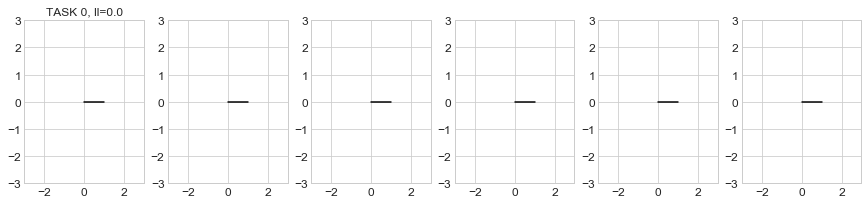

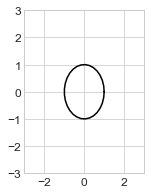

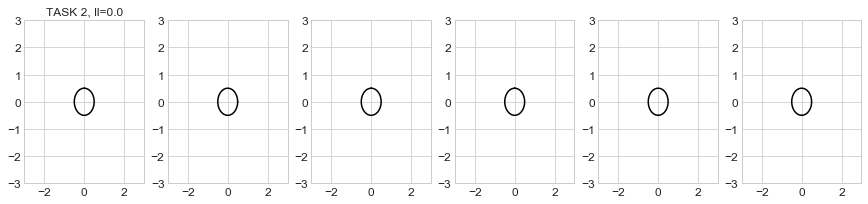

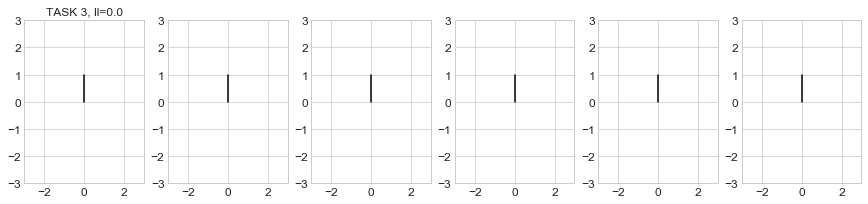

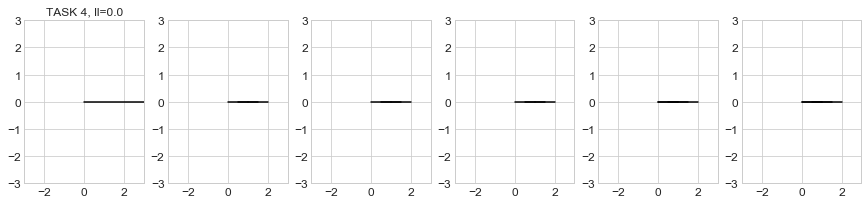

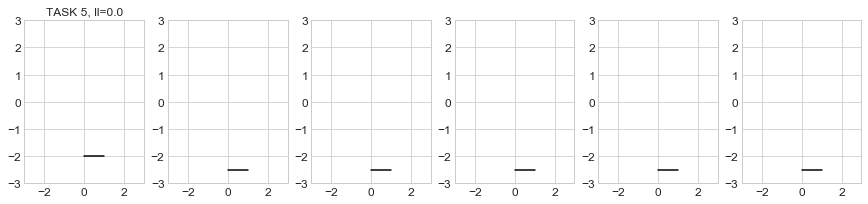

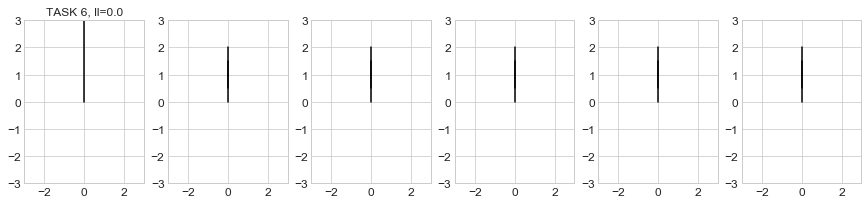

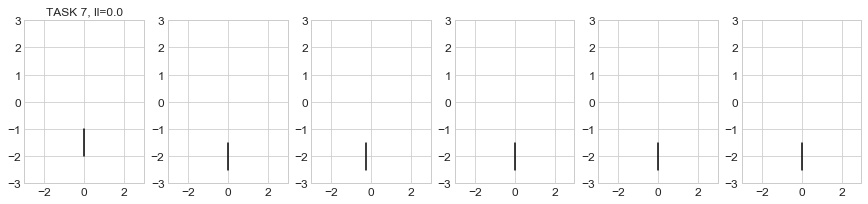

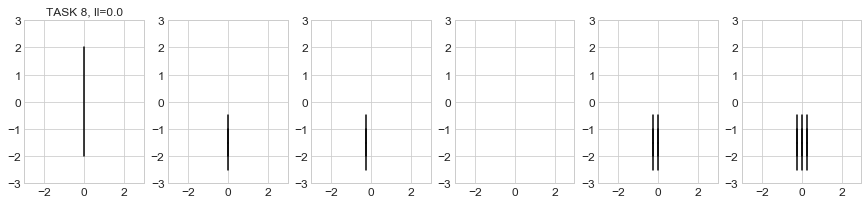

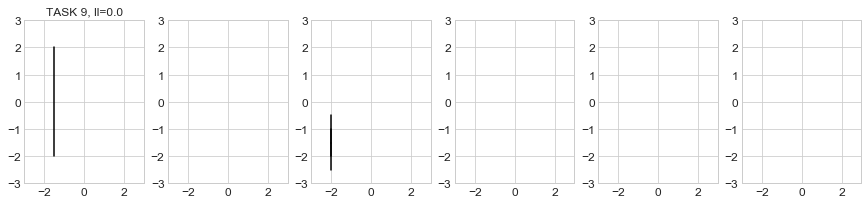

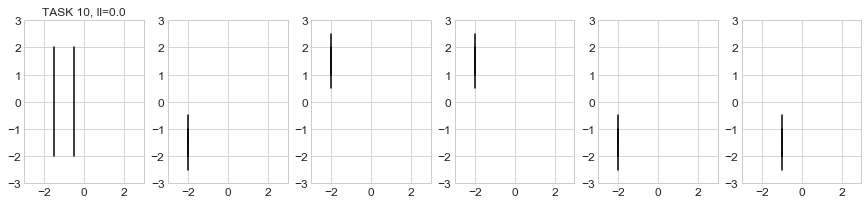

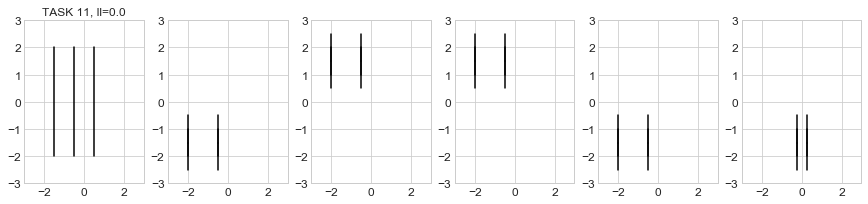

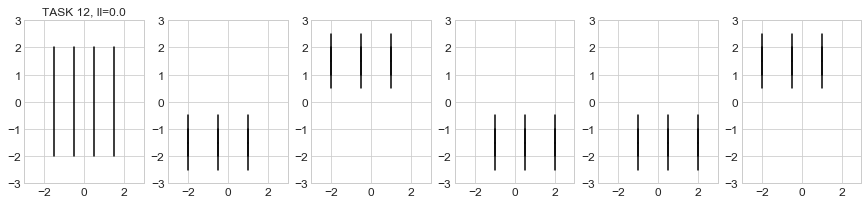

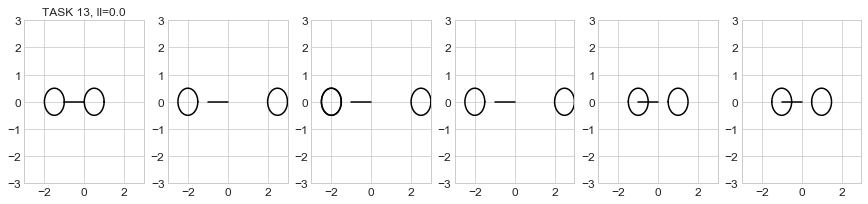

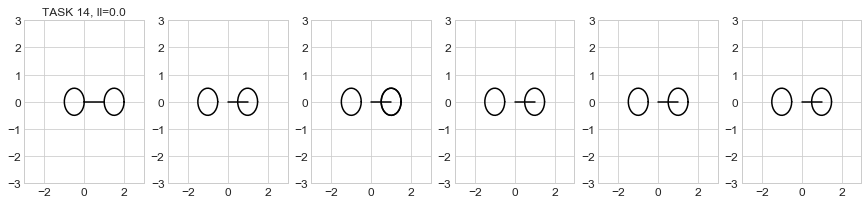

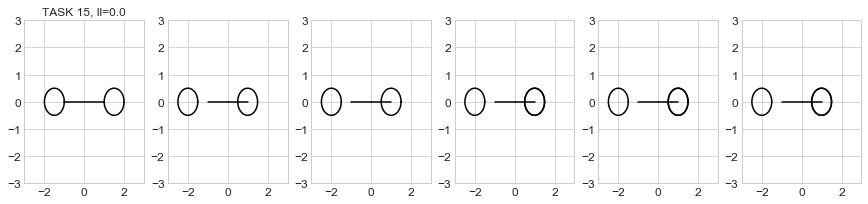

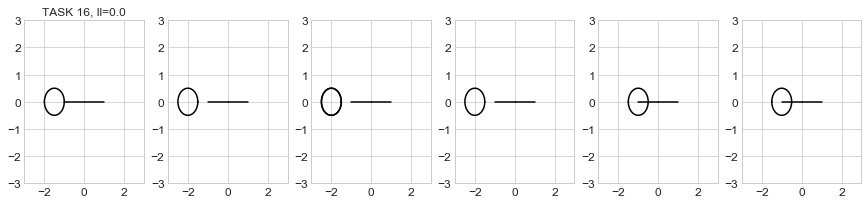

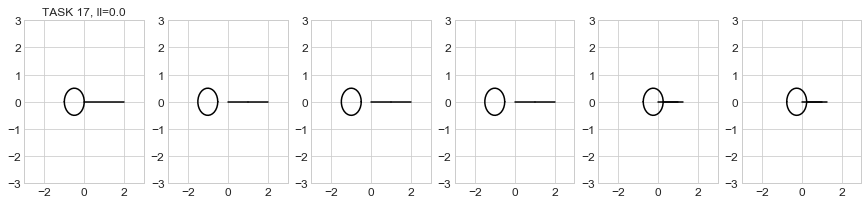

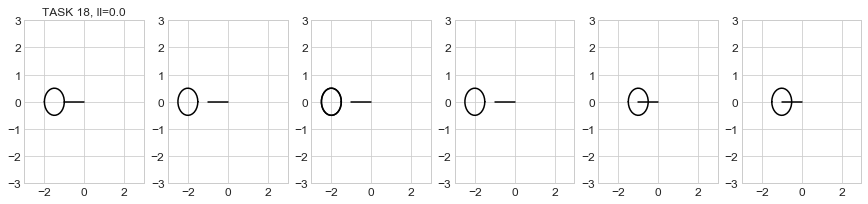

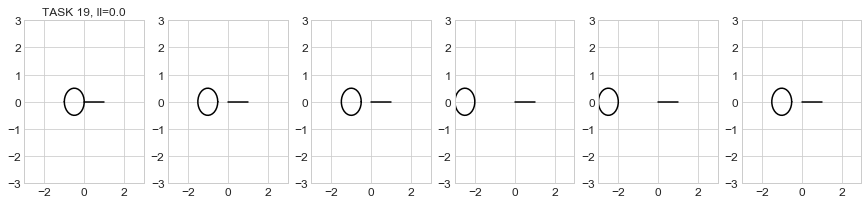

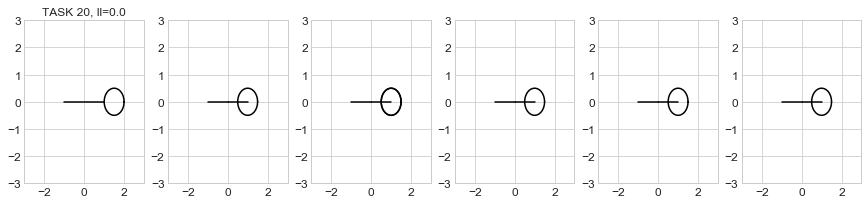

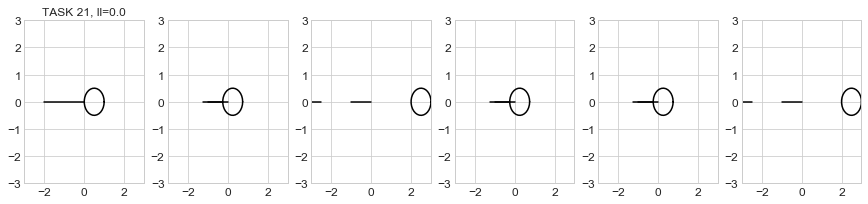

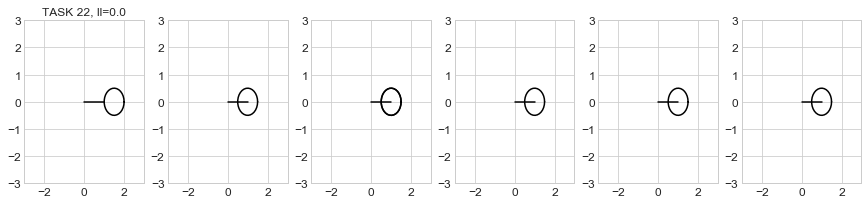

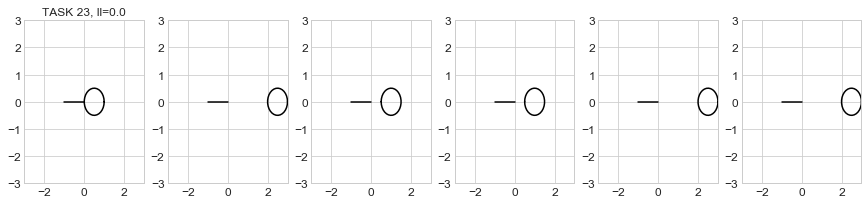

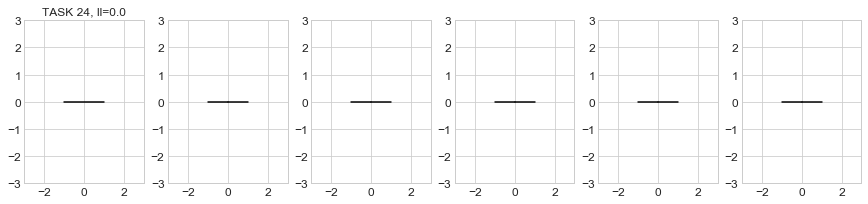

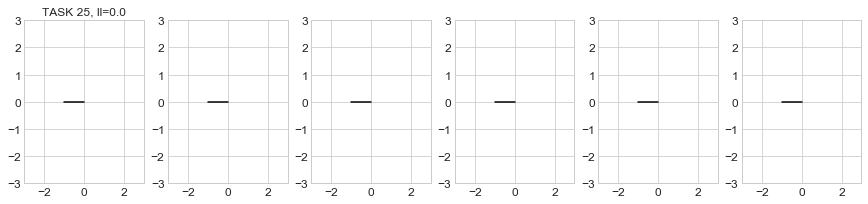

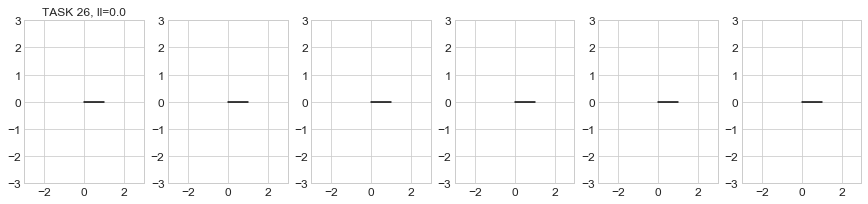

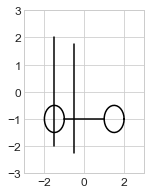

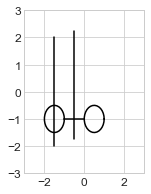

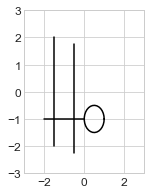

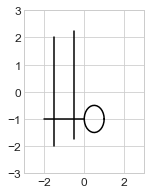

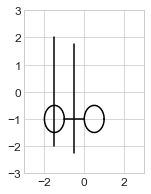

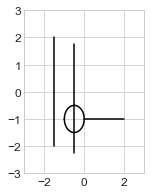

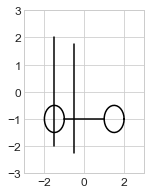

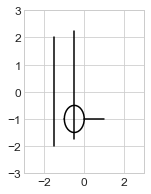

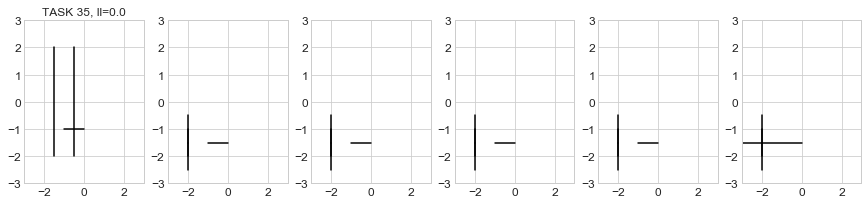

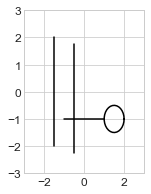

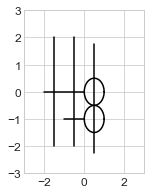

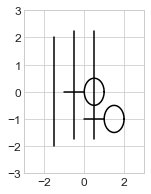

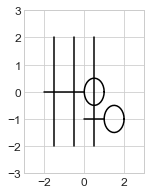

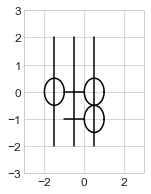

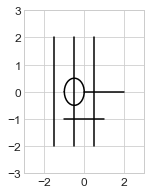

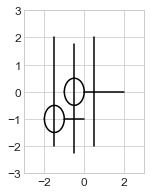

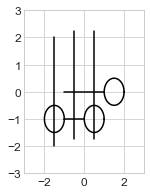

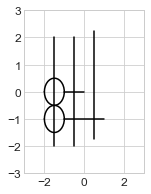

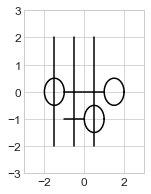

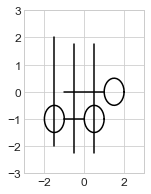

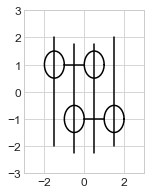

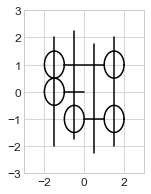

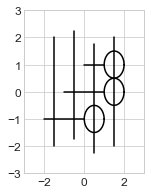

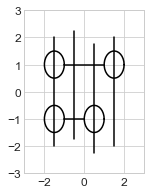

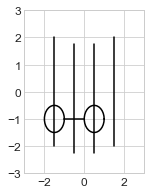

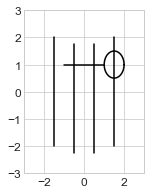

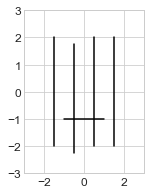

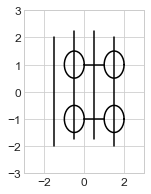

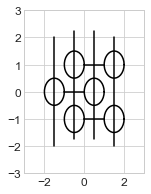

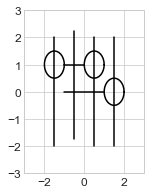

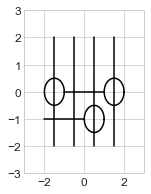

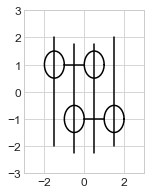

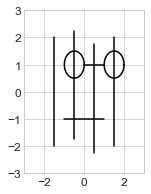

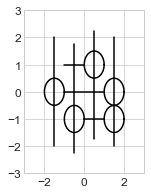

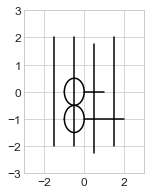

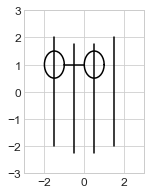

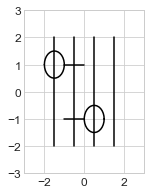

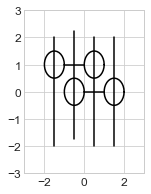

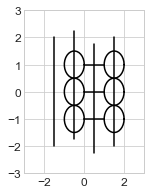

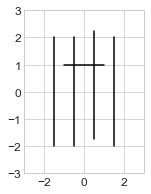

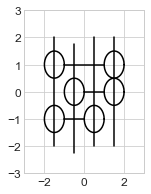

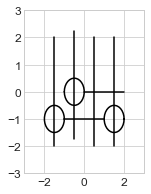

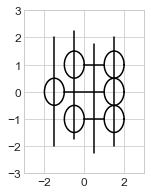

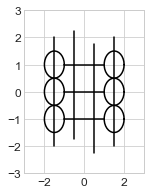

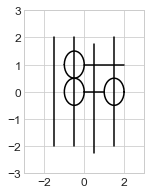

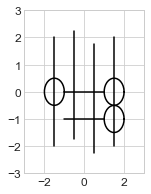

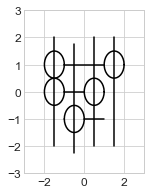

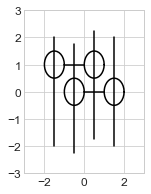

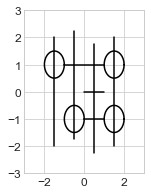

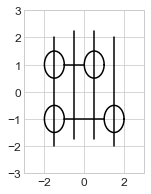

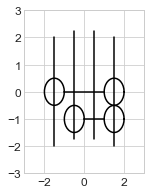

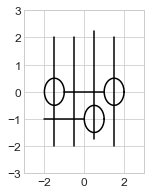

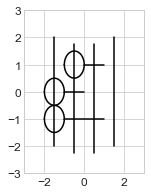

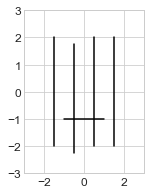

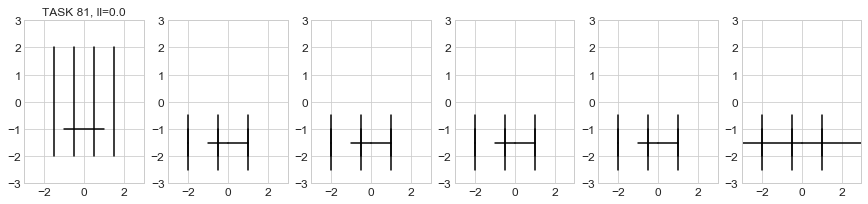

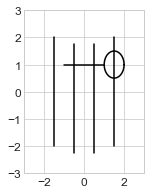

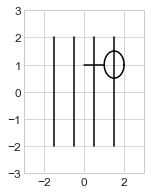

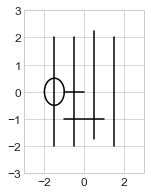

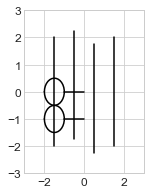

In [132]:
if False:
    trainset = "S8full"
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S8full_2019-10-10_09-45-18"
    exptdir = "2019-10-10T09:45:23.421494"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=4_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S8full_graph=True.pickle"
else:
    trainset = "S9full"
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S9full_2019-10-10_09-45-29"
    exptdir = "2019-10-10T09:45:47.447037"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=4_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9full_graph=True.pickle"

f = "experimentOutputs/draw/{}/{}".format(exptdir, checkpoint)
result = loadfun(f)

# == 2) Load tasks
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
tasks = makeSupervisedTasks(trainset=trainset, doshaping=True)

print("Num tasks {}".format(len(result.taskSolutions)))
assert len(result.taskSolutions)==len(tasks)


# === 4) Load tools to work with tasks libraries
import dreamcoder.domains.draw.primitives as P


# ################## DISPLAY ALL TASKS AND SOLUTIONS
# ===== print all task solutions
plt.close()
for i, t in enumerate(tasks):
    plt.figure(figsize=(15,3))

    # 1) Plot this ground truth program
    ax = plt.subplot(1,6,1)
    P.plotOnAxes(t.strokes, ax)
    print("--- TASK {}".format(i))
    
    # 2) best posterior
    

    # 3) Plot frontiers solutions:    
    nfront = len(result.allFrontiers[t])
    if nfront>0:
        ll = result.allFrontiers[t].bestPosterior.logLikelihood
        plt.title("TASK {}, ll={}".format(i, ll))
        for ii, f in enumerate(result.allFrontiers[t]):
            ax = plt.subplot(1,6,ii+2)
            P.plotOnAxes(f.program.evaluate([]), ax)
#             plt.title(f.program.betaNormalForm())
            print(f.program.betaNormalForm())
    else:
        print("No frontiers")

In [131]:
tasknum =25
for f in result.allFrontiers[tasks[tasknum]]:
    print(f)
    print('--')

FrontierEntry(program=(#(lambda (lambda (#(lambda (lambda (lambda (transform (#(lambda (connect (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist2 #(repeat line rep2 (transmat None None (Some dist8) None None)) $0))) (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist3 line $0) #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None))) (transmat None $1 None (Some $2) None))))) $0 $1 (transform line (transmat None None None (Some dist2) None))))) (Some angle4) dist5), logPrior=-7.939017655247573, logLikelihood=0.0
--
FrontierEntry(program=(#(lambda (lambda (lambda (transform (#(lambda (connect (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist2 #(repeat line rep2 (transmat None None (Some dist8) None None)) $0))) (#(lambd

#(lambda (#(lambda (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) $0 (reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle5))) $0 (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist3 line line)))
<function Abstraction.evaluate.<locals>.<lambda> at 0x1c358a20d0>
cant plot
----
#(lambda (lambda (#(lambda (lambda (lambda (transform (#(lambda (connect (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist2 #(repeat line rep2 (transmat None None (Some dist8) None None)) $0))) (#(lambda (lambda (lambda (transform (connect $0 $1) (transmat None (Some angle2) None (Some $2) None))))) dist3 line $0) #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None N

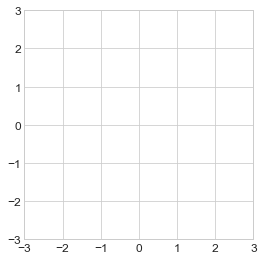

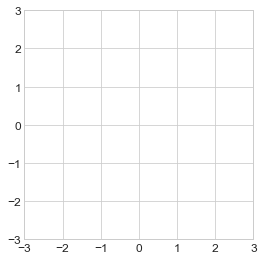

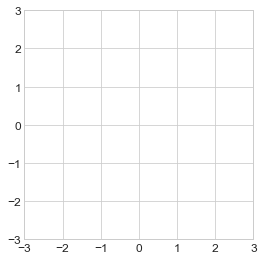

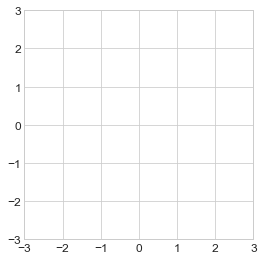

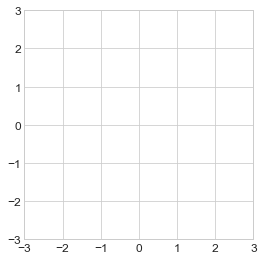

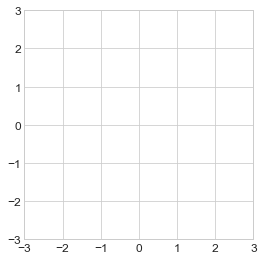

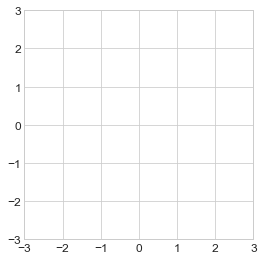

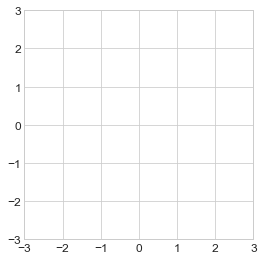

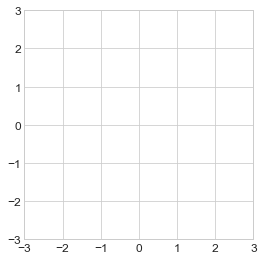

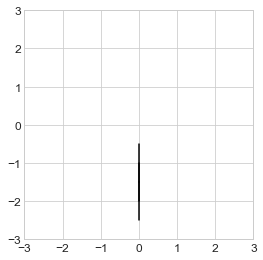

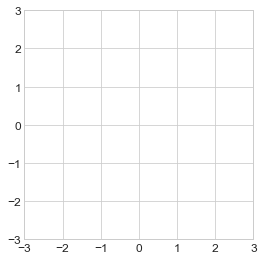

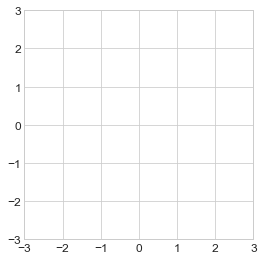

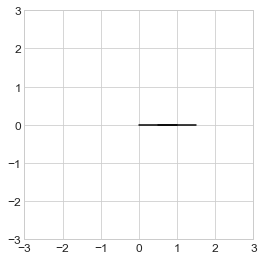

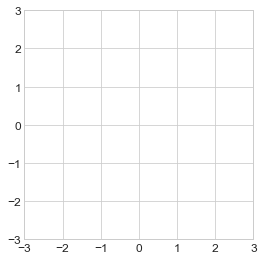

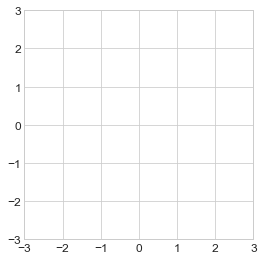

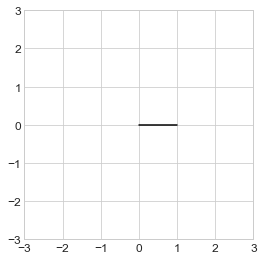

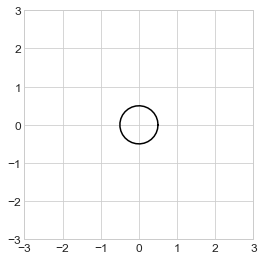

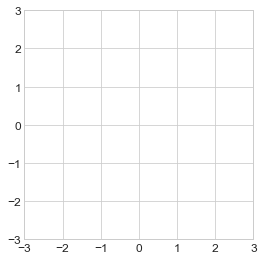

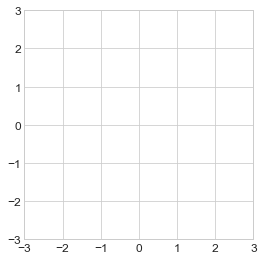

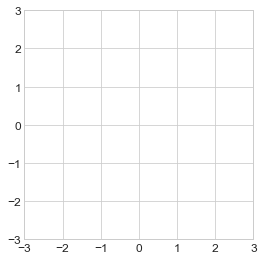

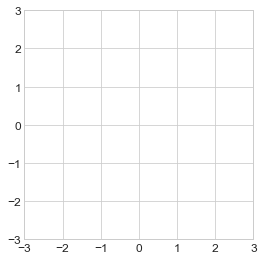

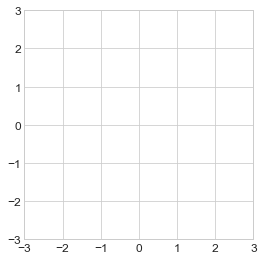

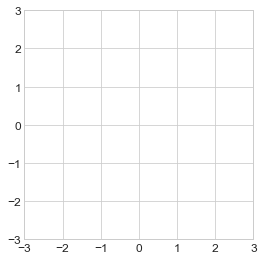

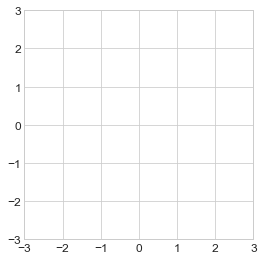

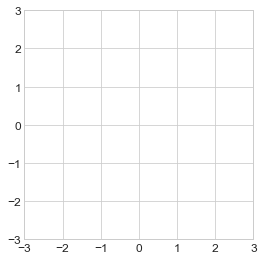

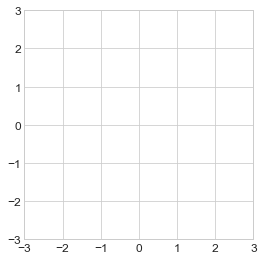

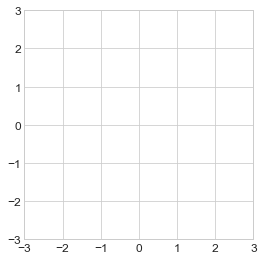

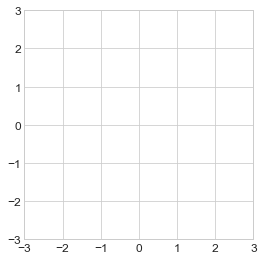

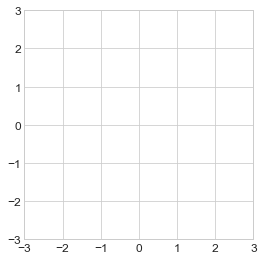

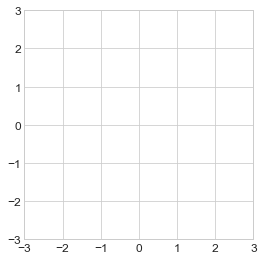

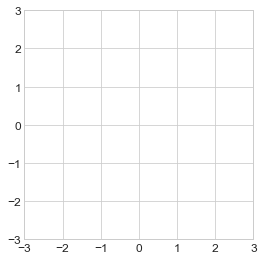

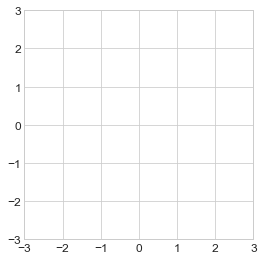

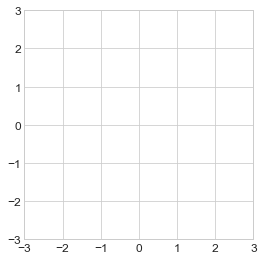

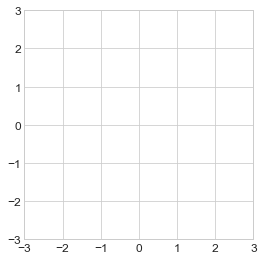

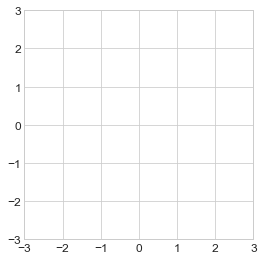

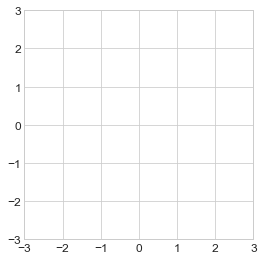

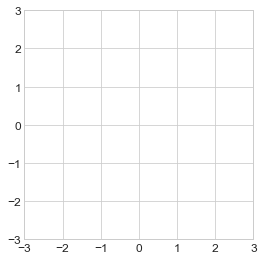

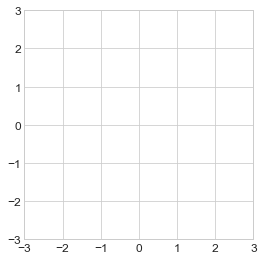

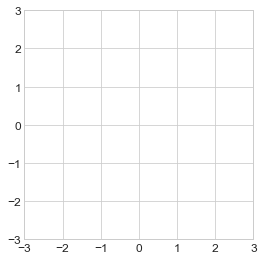

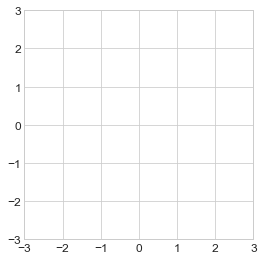

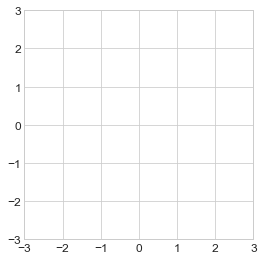

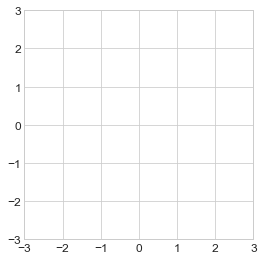

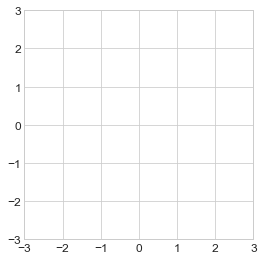

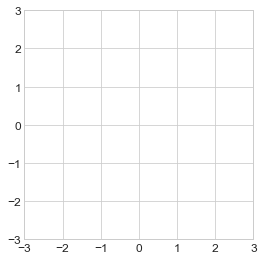

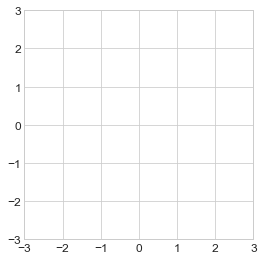

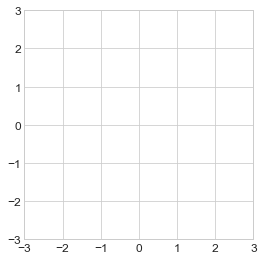

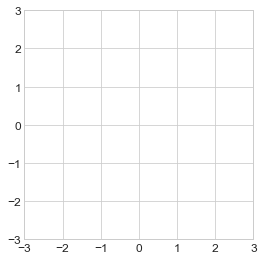

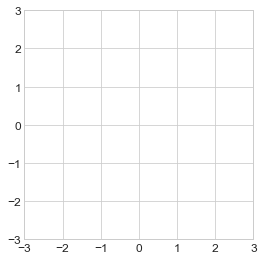

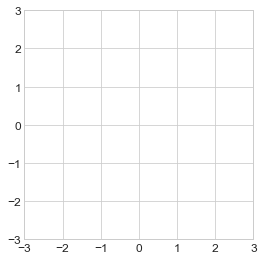

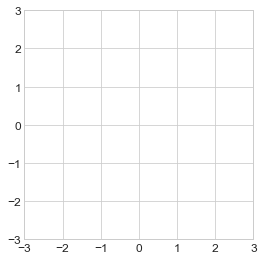

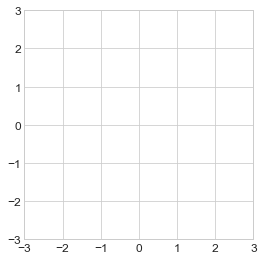

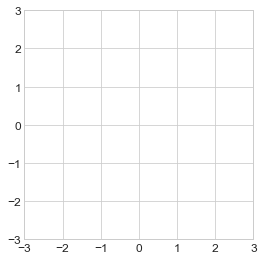

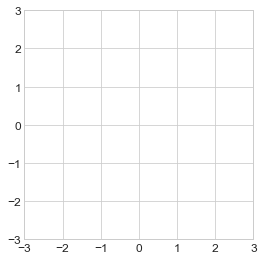

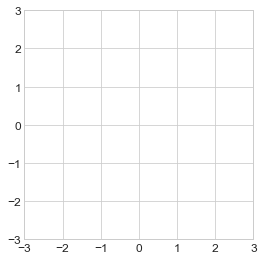

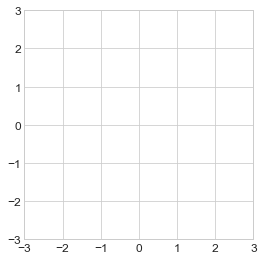

In [123]:
for p in result.grammars[-1].primitives:
    print(p)
    print(p.evaluate([]))
    try:
        
        P.plot(p.evaluate([]))
    except:
        print("cant plot")
    print('----')

In [83]:
result.allFrontiers[tasks[0]].bestPosterior.logLikelihood

0.0

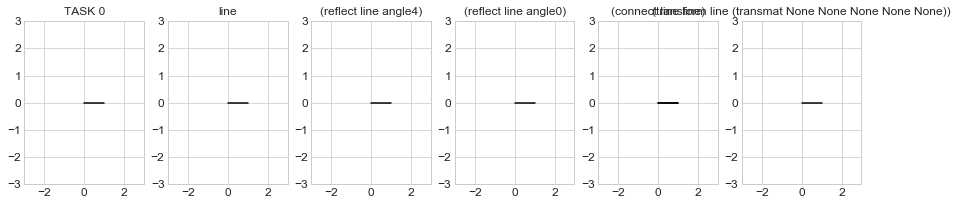

In [70]:
for i, t in enumerate(tasks):
    if i==0:
        plt.figure(figsize=(15,3))

        # 1) Plot this ground truth program
        ax = plt.subplot(1,6,1)
        plt.title("TASK {}".format(i))
        P.plotOnAxes(t.strokes, ax)

        # 2) Plot frontiers solutions:    
        nfront = len(result.allFrontiers[t])
        if nfront >0:
            for ii, f in enumerate(result.allFrontiers[t]):
                ax = plt.subplot(1,6,ii+2)
                P.plotOnAxes(f.program.evaluate([]), ax)
                plt.title(f.program.betaNormalForm())
    #         print(result.allFrontiers[t])
        else:
            print("No frontiers")

In [ ]:
# === TOOLS to analyze/plot dreamcoder programs
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
tasks = makeSupervisedTasks(trainset=trainset, doshaping=True)

assert result.taskSolutions==len(tasks)


# === 3) Load tools to to things with tasks/programs
datflat = []
datflat.append({
    "trialstrokes":strokes,
    "trialonset": 0,
    "stimname": "test",
    "trialprimitives":[],
    "trialcircleparams":[],
    "condition":[],
})


# ==== do segmentation
import sys
sys.path.append("/Users/lucastian/tenen/TENENBAUM/drawgood/experiments")
from segmentation import *
from utils import *


# PLOT
getSegmentation(datflat)

from plotsDatFlat import *
from plotsSingleSubj import *
from segmentation import *

plotDrawingAndTimecourse(datflat[0])


In [125]:
list(result.allFrontiers[tasks[8]])

[FrontierEntry(program=#(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)), logPrior=-2.883850317439259, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle4), logPrior=-7.519560953406131, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle2), logPrior=-7.83812587986904, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle0), logPrior=-7.901931741388596, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 N

In [112]:
result.taskSolutions[tasks[0]]
result.allFrontiers[tasks[5]].bestPosterior.program.betaNormalForm()
# print(result.allFrontiers[tasks[0]].bestPosterior.program.parseHumanReadable())


(transform line (transmat None None (Some dist8) None None))

In [322]:
result.allFrontiers[tasks[5]].bestPosterior.program.evaluate([])

[array([[2., 0.],
        [3., 0.]])]

In [118]:
from dreamcoder.domains.draw.main import dreamFromGrammar

dreams = dreamFromGrammar(N=10)
for d in dreams:
    print(d)
    print('--')

(reflect (repeat line rep0 (transmat None None None (Some dist4) (Some trs))) angle4)
--
(transform (repeat (repeat (transform (reflect (reflect (repeat (reflect (reflect (reflect (repeat circle rep1 (transmat (Some scale0) (Some angle6) (Some dist9) None (Some trs))) angle4) angle0) angle5) rep6 (transmat None None (Some dist3) (Some dist6) None)) angle0) angle2) (transmat None (Some angle4) None (Some dist3) (Some rts))) rep5 (transmat None None None (Some dist11) (Some rts))) rep3 (transmat None None None None (Some rts))) (transmat (Some scale1) None None (Some dist8) None))
--
(repeat (repeat (reflect (reflect (repeat line rep2 (transmat (Some scale0) None None (Some dist13) (Some trs))) angle3) angle7) rep4 (transmat (Some scale0) (Some angle5) None (Some dist0) None)) rep0 (transmat (Some scale1) (Some angle2) None None (Some trs)))
--
(transform (reflect line angle1) (transmat None None None (Some dist8) (Some trs)))
--
(transform (reflect (connect circle circle) angle4) (trans

In [182]:
print(dreams[4])
for i in dreams[4].walk():
    print(i)
    
# (reflect (repeat line rep0 (transmat None None None (Some dist4) (Some trs))) angle4)

(transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts))))
(0, (transform (reflect (connect circle circle) angle4)))
(0, transform)
(0, (reflect (connect circle circle) angle4))
(0, (reflect (connect circle circle)))
(0, reflect)
(0, (connect circle circle))
(0, (connect circle))
(0, connect)
(0, circle)
(0, circle)
(0, angle4)
(0, (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transmat (Some scale0) (Some angle6) None None))
(0, (transmat (Some scale0) (Some angle6) None))
(0, (transmat (Some scale0) (Some angle6)))
(0, (transmat (Some scale0)))
(0, transmat)
(0, (Some scale0))
(0, Some)
(0, scale0)
(0, (Some angle6))
(0, Some)
(0, angle6)
(0, None)
(0, None)
(0, (Some rts))
(0, Some)
(0, rts)


In [1]:
# === walk along the string. whenever you see a line or circle, keep note of its depth.
# === outputs list of primitives and thier depths
# === NOTE problem, this cannot deal with lets say want to connect(connect(p1, p2), p3) --> i.e,, making a new thing
# that is three primtiives. it will call these different depth (2,2,1). 
# === PROBLEM: doesn't get repeats yet - will only output one, even though repeating multiple times.
words = str(dreams[1].betaNormalForm()).split()
depth = 0
prim = []
depthlist = []
for w in words:
    
    if w.find("circle")>-1:
        prim.append("C")
        depthlist.append(depth)
    elif w.find("line")>-1:
        prim.append("L")
        depthlist.append(depth)
        
    print("depth {}: {}".format(depth, w))       
    if w.find("(")>-1:
        depth+=1
    elif w.find(")")>-1:
        depth-=1

print(prim)
print(depthlist)

NameError: name 'dreams' is not defined

In [325]:
# ==== given program convert into "strokes", so that can pass into same behavioral aalysis as for subjects
import numpy as np
def program2strokes(program):
    # program is list of numpy arrays
    # will put down times in order. will be in fake milliseconds. 
    
    on = 1
    off = 300
    strokes = []
    for p in program:
        times = np.linspace(on, off, p.shape[0])
        p = np.concatenate((p, times[:,None]), axis=1)
        on+=500
        off+=500
        strokes.append(p)
    return strokes
    
# strokes = program2strokes(dreams[1].evaluate([]))
strokes = program2strokes(result.allFrontiers[tasks[1]].bestPosterior.program.evaluate([]))
strokes = [s.tolist() for s in strokes]

In [291]:
dreams[1]

(transform (repeat (repeat (transform (reflect (reflect (repeat (reflect (reflect (reflect (repeat circle rep1 (transmat (Some scale0) (Some angle6) (Some dist9) None (Some trs))) angle4) angle0) angle5) rep6 (transmat None None (Some dist3) (Some dist6) None)) angle0) angle2) (transmat None (Some angle4) None (Some dist3) (Some rts))) rep5 (transmat None None None (Some dist11) (Some rts))) rep3 (transmat None None None None (Some rts))) (transmat (Some scale1) None None (Some dist8) None))

FAILED TO LOAD STIM .png file...


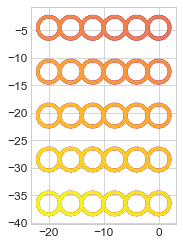

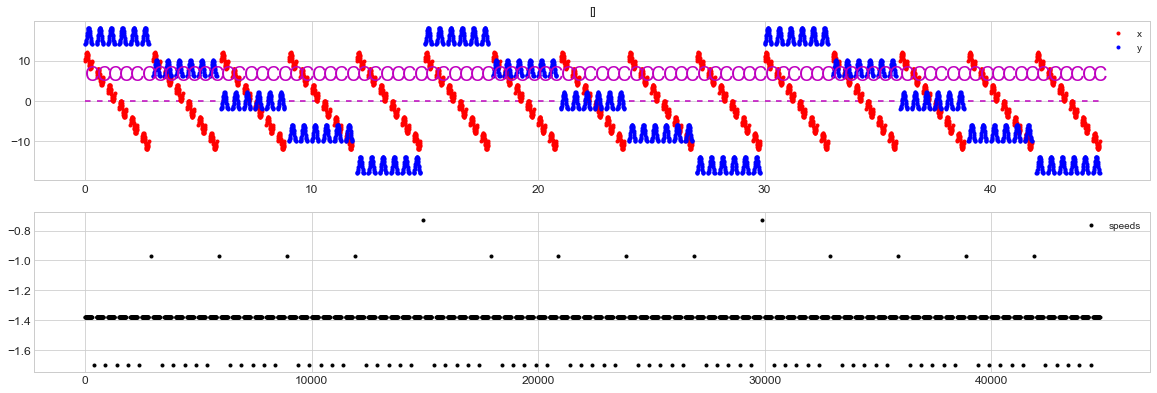

In [251]:
tmp = np.linspace(1, 50, 50)

tmp[-1,None]

print(tmp[:, None].shape)

(50, 1)


In [105]:
result.allFrontiers[tasks[0]].bestPosterior.program

(#(lambda (connect $0 line)) circle)

In [158]:
def reorderProgram():
    # given a program, output all the ways it could be ordered if allowed to permute within each level:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-158-974a76825963>, line 1)

In [153]:
# ===== given some program and some behavioral sequence compute the likelihood
# === first thing, given some sequence, get edit distance from that sequence:
import pyxdameraulevenshtein as dl

# 1) get behavior in terms of circles and lines (each numnbered)
def segmentBehavior():
    # --- name circles and lines based on lica
    # -- first divide drawing into 4 vertical stripes
    
    return ["C1", "C2", "L1", "L2"]

def segmentProgram():
    return ["C1", "L1", "C2", "L2"]

def stringDist(a, b):
    # rerutns value between 0 and 1 (1 is max difference)
    # first map all the items to idx identifiers (e.g. from  ["C1", "C2", "L1", "L2"] to [1,2,3,4]
#     alphabet = ["C1", "C2", "L1", "L2"]
#     A = [alphabet.index(aa) for aa in a]
#     B = [alphabet.index(bb) for bb in b]
    
    return dl.normalized_damerau_levenshtein_distance(a,b)
    
    
    
stringDist(segmentBehavior(), segmentProgram())



0.25

In [151]:
import pyxdameraulevenshtein as dl

dl.damerau_levenshtein_distance(["C2", "C0", "L1", "L2"], ["C9", "LLL", "C", "L"])


4

loaded path: experimentOutputs/draw/2019-10-01T02:19:27.116528/draw_aic=1.0_arity=3_ET=1800_it=6_MF=5_noConsolidation=False_pc=10_RW=False_solver=python_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_rec=False.pickle
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	


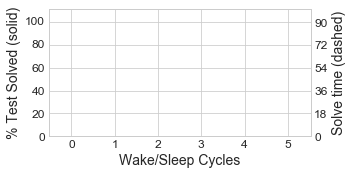

In [12]:
resultPaths=[f]
plotECResult(resultPaths)
showSynergyMatrix([result])